# Install all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import json


# Gather
This entails bringing in the datasets required for this analysis

In [2]:
#Bring in the provided csv file for the twitter archive

ta = pd.read_csv("C:/Users/fasasio/OneDrive - Access Bank PLC/Downloads/twitter-archive-enhanced.csv")

In [3]:
#Bring in the tweet_json text file

tj = pd.read_json("C:/Users/fasasio/OneDrive - Access Bank PLC/Desktop/tweet-json.txt",lines=True)

In [4]:
#Bring in the tweet image predictions text file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

ip = pd.read_csv("image-predictions.tsv",sep = '\t')

# Assess
This entails checking the quality and tidiness of the datasets

Data 1: Twitter Archive (ta)

In [5]:
#take a look at sample data
ta.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1292,708109389455101952,NaN,NaN,2016-03-11 01:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He was caught off guard by ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708109389...,10,10,Remington,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
93,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562...,12,10,None,None,None,None,None
147,863432100342583297,NaN,NaN,2017-05-13 16:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Belle. She's never been more pupset. E...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863432100...,12,10,Belle,None,None,None,None
1605,685681090388975616,6.855479e+17,4.196984e+09,2016-01-09 04:34:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jack deserves another round of applause. If yo...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None


In [6]:
#check the number of rows and columns 
ta.shape  #has 2356 rows and 17 columns

(2356, 17)

In [7]:
#get the information about the data
ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
#check for rows that contains retweet
ta[ta['text'].str.startswith('RT')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
1286,708400866336894977,NaN,NaN,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,NaN,NaN,NaN,https://vine.co/v/iHFqnjKVbIQ,12,10,None,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


Details: 

- in_reply_to_status_id ,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls contain missing values
- convert timestamp to appropriate datatype and split into date and time or extract just date
- delete text column
- combine doggo,floofer,pupper,puppo into a column called stages
- delete rows that contains retweets

Data 2: Additional Tweet Data JSON (tj)

In [9]:
#take a look at sample data
tj.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
176,2017-04-27 00:38:11+00:00,857393404942143489,857393404942143488,"Instead of the usual nightly dog rate, I'm sha...",False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 857393395161067520, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,6236,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
590,2016-11-17 01:35:54+00:00,799063482566066176,799063482566066176,This is Mister. He only wears the most fashion...,False,"[0, 84]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 799063471937769472, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,9058,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
353,2017-02-13 22:03:49+00:00,831262627380748289,831262627380748288,This is Tucker. He's feeling h*ckin festive an...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 831262617675051009, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,13066,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1445,2016-02-08 00:20:23+00:00,696488710901260288,696488710901260288,12/10 revolutionary af https://t.co/zKzq4nIY86,False,"[0, 46]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 696488707105386500, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2788,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1230,2016-03-25 01:29:21+00:00,713175907180089344,713175907180089344,Say hello to Opie and Clarkus. Clarkus fell as...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 713175901853319168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4851,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [10]:
#check the number of rows and columns
tj.shape #has 2354 rows and 31 columns

(2354, 31)

In [11]:
#get details about the data
tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

Details:
- extended_entities, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, geo, coordinates, place, contributors, possibly_sensitive, possibly_sensitive_appealable, lang, retweeted_status, quoted_status_id, quoted_status_id_str and quoted_status contain missing values
- extract date from created_at
- change data type of id
- drop columns not needed for this analysis

Data 3: Image Predictions (ip)

In [12]:
#look at the top 5 rows to enable you visually access the data
ip.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
#check number of rows and columns 
ip.shape #has 2075 rows and 12 columns

(2075, 12)

In [14]:
#get details about the data.
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Details

- Change the datatype of tweet_id to string
- Change the datatype of img_num to category

# DATA ISSUES

QUALITY:
- Change the data type of some columns
- Deal with missing values either by removing or imputing values
- Extract date from the timestamp column
- Replace None with NaN
- Fill incorrect and empty animal names with 'Unknown'
- Remove rows that contains retweet
- Remove duplicates
- Rename some columns headers to be more descriptive



TIDINESS: 
- Combine doggo,floofer,pupper,puppo into a column called stages
- Dropping columns not necessary for the analysis
- Merge the three datasets into one

# Clean
This entails coding to clean the dataset as identified under the Assess heading

Data 1: Twitter Archive (ta)

In [15]:
#make a copy of ta
ta_copy = ta.copy()

# 1

DEFINE: Remove all information related to retweets

CODE: Keep only the rows that are empty for retweet-related columns which are retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

In [16]:
ta_copy = ta_copy[ta_copy.retweeted_status_id.isna()]

In [17]:
ta_copy = ta_copy[ta_copy.retweeted_status_user_id.isna()]

In [18]:
ta_copy = ta_copy[ta_copy.retweeted_status_timestamp.isna()]

TEST: Check that all records related to retweets have been dropped

In [19]:
ta_copy.shape

(2175, 17)

In [20]:
ta_copy.retweeted_status_id.isna().value_counts()

True    2175
Name: retweeted_status_id, dtype: int64

In [21]:
ta_copy.retweeted_status_user_id.isna().value_counts()

True    2175
Name: retweeted_status_user_id, dtype: int64

In [22]:
ta_copy.retweeted_status_timestamp.isna().value_counts()

True    2175
Name: retweeted_status_timestamp, dtype: int64

In [23]:
ta_copy[ta_copy.name.str.startswith('RT')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


# 2

DEFINE: For the columns with missing values (in_reply_to_status_id ,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls) contain missing values,
take a deep dive into the content so you can know either to remove column or impute values

CODE: 
- Check the number of missing values in each column
- Drop columns who has about 80% missing values

In [24]:
ta_copy.in_reply_to_status_id.isna().value_counts()

True     2097
False      78
Name: in_reply_to_status_id, dtype: int64

In [25]:
ta_copy.in_reply_to_user_id.isna().value_counts()

True     2097
False      78
Name: in_reply_to_user_id, dtype: int64

In [26]:
ta_copy.retweeted_status_id.isna().value_counts()

True    2175
Name: retweeted_status_id, dtype: int64

In [27]:
ta_copy.retweeted_status_user_id.isna().value_counts()

True    2175
Name: retweeted_status_user_id, dtype: int64

In [28]:
ta_copy.retweeted_status_timestamp.isna().value_counts()

True    2175
Name: retweeted_status_timestamp, dtype: int64

In [29]:
ta_copy.expanded_urls.isna().value_counts()

False    2117
True       58
Name: expanded_urls, dtype: int64

Asides expanded_urls, the higher number of missing values in the remaining columns justifies dropping these columns

In [30]:
#drop the columns
ta_copy.drop(['in_reply_to_status_id' ,'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [31]:
#drop the expanded_urls column because it is not necessary for the intended analysis
ta_copy.drop(['expanded_urls'], axis=1, inplace=True)

TEST: Check that the columns have been dropped

In [32]:
ta_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


# 3

DEFINE: Change the data type of tweet_id to string and after extracting date from timestamp, change the datatype to datetime

CODE: Use astype() and to_timestamp() to change the datatypes

In [33]:
#change the datatype of tweet_id to string
ta_copy.tweet_id = ta_copy.tweet_id.astype(str)

In [34]:
#extract date from the datetime column
ta_copy['date'] = ta_copy.timestamp.str.split(n=1,expand=True)[0]

In [35]:
#convert timestamp to appropriate datatype and then extract data from the column 
ta_copy.date = pd.to_datetime(ta_copy.date)

In [36]:
#drop timestamp column
ta_copy.drop('timestamp', axis=1,inplace=True)

TEST: Check if the data types have been changed

In [37]:
ta_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   source              2175 non-null   object        
 2   text                2175 non-null   object        
 3   rating_numerator    2175 non-null   int64         
 4   rating_denominator  2175 non-null   int64         
 5   name                2175 non-null   object        
 6   doggo               2175 non-null   object        
 7   floofer             2175 non-null   object        
 8   pupper              2175 non-null   object        
 9   puppo               2175 non-null   object        
 10  date                2175 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.9+ KB


# 4

DEFINE: Replace 'None' with NaN and also incorrect dog names with 'Unknown'

CODE: Use the replace() function

In [38]:
#replace None with NaN
ta_copy = ta_copy.replace('None',np.nan)

In [39]:
#replace missing dog names and dog names that start with small letters with 'Unknown' 
ta_copy.name = ta_copy.replace(ta_copy.name.str.islower(),'Unknown')
ta_copy.name = ta_copy.replace(np.nan, 'Unknown')

TEST:

In [40]:
ta_copy[ta_copy.name.str.islower()]

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date


In [41]:
ta_copy.name.isna().sum()

0

# 5

DEFINE: combine the doggo,floofer,pupper and puppo columns into one column 

CODE: Use the melt() function

In [42]:
id_var =  ['tweet_id','source','text','rating_numerator','rating_denominator','name', 'date']
value_var = ['doggo','floofer','pupper','puppo']
ta_final = ta_copy.melt(id_vars = id_var, value_vars = value_var, var_name = 'Stage_var', value_name = 'stage')

#drop 'Stage_var'
ta_final.drop('Stage_var',axis=1, inplace=True)

#drop duplicates
ta_final.drop_duplicates(keep = 'first',inplace=True)

CHECK:

In [43]:
ta_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 7430
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2531 non-null   object        
 1   source              2531 non-null   object        
 2   text                2531 non-null   object        
 3   rating_numerator    2531 non-null   int64         
 4   rating_denominator  2531 non-null   int64         
 5   name                2531 non-null   object        
 6   date                2531 non-null   datetime64[ns]
 7   stage               356 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 178.0+ KB


In [44]:
ta_final.stage.value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: stage, dtype: int64

Data 2: Tweet JSON (tj)

In [45]:
#make a copy of the data
tj_copy = tj.copy()

# 6

DEFINE: convert created_at to string, then split to extract data and then convert back to datetime. Convert id and id_str to string

CODE:

In [46]:
tj_copy.created_at = tj_copy.created_at.astype(str)
tj_copy.created_at = tj_copy.created_at.str.split(n=1,expand=True)[0]
tj_copy.created_at = pd.to_datetime(tj_copy.created_at)

In [47]:
tj_copy.id = tj_copy.id.astype(str)
tj_copy.id_str = tj_copy.id_str.astype(str)

TEST:

In [48]:
tj_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   created_at                     2354 non-null   datetime64[ns]
 1   id                             2354 non-null   object        
 2   id_str                         2354 non-null   object        
 3   full_text                      2354 non-null   object        
 4   truncated                      2354 non-null   bool          
 5   display_text_range             2354 non-null   object        
 6   entities                       2354 non-null   object        
 7   extended_entities              2073 non-null   object        
 8   source                         2354 non-null   object        
 9   in_reply_to_status_id          78 non-null     float64       
 10  in_reply_to_status_id_str      78 non-null     float64       
 11  in_reply_to_user_

# 7

DEFINE: Deal with columns that have missing values

CODE:

In [49]:
#show the count of missing values in the columns
print(tj_copy.quoted_status.isna().sum())
print(tj_copy.quoted_status_id_str.isna().sum())
print(tj_copy.quoted_status_id.isna().sum())
print(tj_copy.retweeted_status.isna().sum())
print(tj_copy.contributors.isna().sum())
print(tj_copy.place.isna().sum())
print(tj_copy.coordinates.isna().sum())
print(tj_copy.geo.isna().sum())
print(tj_copy.in_reply_to_status_id.isna().sum())
print(tj_copy.in_reply_to_status_id_str.isna().sum())
print(tj_copy.in_reply_to_user_id.isna().sum())
print(tj_copy.in_reply_to_user_id_str.isna().sum())
print(tj_copy.in_reply_to_screen_name.isna().sum())

2326
2325
2325
2175
2354
2353
2354
2354
2276
2276
2276
2276
2276


In [50]:
#drop columns that have almost more than 80% of the values empty and not useful to this analysis
to_drop = ['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id','in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 'coordinates', 'place','contributors', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status']

tj_copy.drop(columns = to_drop, inplace=True)

TEST:

In [51]:
tj_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   created_at                     2354 non-null   datetime64[ns]
 1   id                             2354 non-null   object        
 2   id_str                         2354 non-null   object        
 3   full_text                      2354 non-null   object        
 4   truncated                      2354 non-null   bool          
 5   display_text_range             2354 non-null   object        
 6   entities                       2354 non-null   object        
 7   extended_entities              2073 non-null   object        
 8   source                         2354 non-null   object        
 9   user                           2354 non-null   object        
 10  is_quote_status                2354 non-null   bool          
 11  retweet_count    

# 8

DEFINE: Select only columns needed for this analysis

CODE:

In [52]:
to_use =['created_at', 'id', 'retweet_count', 'favorite_count']

tj_final= tj_copy[to_use]

TEST: Take a look at the cleaned dataset

In [53]:
tj_final.head()

,created_at,id,retweet_count,favorite_count
0,2017-08-01,892420643555336193,8853,39467
1,2017-08-01,892177421306343426,6514,33819
2,2017-07-31,891815181378084864,4328,25461
3,2017-07-30,891689557279858688,8964,42908
4,2017-07-29,891327558926688256,9774,41048


Data 3: Image Predictions(ip)

In [54]:
#make a copy of the data 
ip_copy = ip.copy()

# 9

DEFINE: Change the datatype of tweet_id to string and img_num to category

CODE: 

In [55]:
#convert the datatype of tweet_id to string
ip_copy.tweet_id = ip_copy.tweet_id.astype(str)

In [56]:
#convert 
ip_copy.img_num = ip_copy.img_num.astype('category')

TEST:

In [57]:
ip_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  2075 non-null   object  
 1   jpg_url   2075 non-null   object  
 2   img_num   2075 non-null   category
 3   p1        2075 non-null   object  
 4   p1_conf   2075 non-null   float64 
 5   p1_dog    2075 non-null   bool    
 6   p2        2075 non-null   object  
 7   p2_conf   2075 non-null   float64 
 8   p2_dog    2075 non-null   bool    
 9   p3        2075 non-null   object  
 10  p3_conf   2075 non-null   float64 
 11  p3_dog    2075 non-null   bool    
dtypes: bool(3), category(1), float64(3), object(5)
memory usage: 138.1+ KB


In [58]:
ip_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# 10

DEFINE: Rename columns

CODE:

In [59]:
ip_copy.rename(columns = {'img_num':'no_of_images',
                          'p1_conf': '1st_confidence',
                          'p2_conf': '2nd_confidence',
                          'p3_conf': '3rd_confidence'}
              ,inplace=True)

TEST:

In [60]:
ip_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tweet_id        2075 non-null   object  
 1   jpg_url         2075 non-null   object  
 2   no_of_images    2075 non-null   category
 3   p1              2075 non-null   object  
 4   1st_confidence  2075 non-null   float64 
 5   p1_dog          2075 non-null   bool    
 6   p2              2075 non-null   object  
 7   2nd_confidence  2075 non-null   float64 
 8   p2_dog          2075 non-null   bool    
 9   p3              2075 non-null   object  
 10  3rd_confidence  2075 non-null   float64 
 11  p3_dog          2075 non-null   bool    
dtypes: bool(3), category(1), float64(3), object(5)
memory usage: 138.1+ KB


In [61]:
ip.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1166,735635087207878657,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,1,pug,0.891871,True,goose,0.014377,False,fur_coat,0.008451,False
1384,765719909049503744,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,1,golden_retriever,0.969518,True,Labrador_retriever,0.021696,True,Border_terrier,0.002075,True
502,675870721063669760,https://pbs.twimg.com/media/CWEs1b-WEAEhq82.jpg,1,golden_retriever,0.263892,True,Welsh_springer_spaniel,0.184193,True,beagle,0.182241,True
159,668892474547511297,https://pbs.twimg.com/media/CUhiJ63WEAAw2qm.jpg,1,kelpie,0.421979,True,collie,0.227060,True,Cardigan,0.168211,True
465,675006312288268288,https://pbs.twimg.com/media/CV4aqCwWsAIi3OP.jpg,1,boxer,0.654697,True,space_heater,0.043389,False,beagle,0.042848,True


Merge all the three datasets

In [62]:
#merge ta_final and tj_final first, then merge the resulting dataframe with ip_copy
ta_tj = ta_final.merge(tj_final,how='inner',left_on='tweet_id',right_on='id')
final = ta_tj.merge(ip_copy, how = 'inner', left_on = 'tweet_id', right_on='tweet_id')

In [63]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 2310
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2311 non-null   object        
 1   source              2311 non-null   object        
 2   text                2311 non-null   object        
 3   rating_numerator    2311 non-null   int64         
 4   rating_denominator  2311 non-null   int64         
 5   name                2311 non-null   object        
 6   date                2311 non-null   datetime64[ns]
 7   stage               317 non-null    object        
 8   created_at          2311 non-null   datetime64[ns]
 9   id                  2311 non-null   object        
 10  retweet_count       2311 non-null   int64         
 11  favorite_count      2311 non-null   int64         
 12  jpg_url             2311 non-null   object        
 13  no_of_images        2311 non-null   category    

In [64]:
#save final to csv
final.to_csv('twitter_archive_master.csv')

# Reporting

In [65]:
#another quick look at the data

final.sample(5)

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,stage,created_at,id,...,no_of_images,p1,1st_confidence,p1_dog,p2,2nd_confidence,p2_dog,p3,3rd_confidence,p3_dog
1999,671561002136281088,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,13,10,671561002136281088,2015-12-01,NaN,2015-12-01,671561002136281088,...,1,Gordon_setter,0.469373,True,black-and-tan_coonhound,0.270893,True,Rottweiler,0.153233,True
1262,703041949650034688,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,10,10,703041949650034688,2016-02-26,NaN,2016-02-26,703041949650034688,...,1,hippopotamus,0.581403,False,doormat,0.152445,False,sea_lion,0.026364,False
1165,709566166965075968,"<a href=""http://twitter.com/download/iphone"" r...",This is Olaf. He's gotta be rare. Seems sturdy...,12,10,709566166965075968,2016-03-15,NaN,2016-03-15,709566166965075968,...,1,chow,0.999837,True,Tibetan_mastiff,0.000117,True,Australian_terrier,0.000011,True
582,789268448748703744,"<a href=""http://twitter.com/download/iphone"" r...",This is Stella. She's happier than I will ever...,10,10,789268448748703744,2016-10-21,NaN,2016-10-21,789268448748703744,...,1,malamute,0.812860,True,Siberian_husky,0.120853,True,Eskimo_dog,0.024269,True
1975,672205392827572224,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,9,10,672205392827572224,2015-12-03,NaN,2015-12-03,672205392827572224,...,1,carton,0.952613,False,crate,0.035376,False,pug,0.003267,True


In [66]:
final.shape

(2311, 23)

<AxesSubplot:title={'center':'Tweet Count by Image Number'}, xlabel='Number of Images', ylabel='Count'>

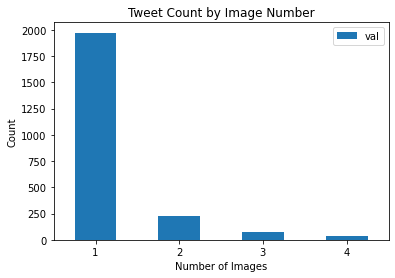

In [67]:
#show the count per img_num category
plot1 = pd.DataFrame()

plot1['val'] = list(final.no_of_images.value_counts().values)
plot1['img'] = list(final.no_of_images.value_counts().index)

plot1.plot.bar(x= 'img', y='val',rot=0, title = 'Tweet Count by Image Number', xlabel='Number of Images', ylabel='Count')

<AxesSubplot:title={'center':'Monthly Trend of Average Retweet Count'}, xlabel='Month', ylabel='Avg retweet_count'>

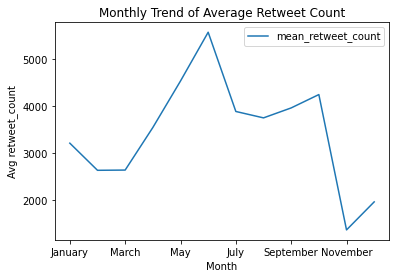

In [68]:
#show the monthly mean favorite count 
plot2 = pd.DataFrame()

#create an additional column 'month' from date
final['month'] = final.date.dt.month_name()

#create an ordered list for months
sort_order = ['January', 'February','March', 'April', 'May', 'June'
             ,'July', 'August', 'September', 'October', 'November', 'December']

#assign values to month and mean retweet count
plot2['month'] = list(final.groupby('month').mean()['retweet_count'].index)
plot2['mean_retweet_count'] = list(final.groupby('month').mean()['retweet_count'].values)

#reset index 
plot2.index = pd.CategoricalIndex(plot2['month'], categories=sort_order, ordered =True)
plot2 = plot2.sort_index()

#plot the monthly  mean retweet count trend
plot2.plot.line(x='month', y = 'mean_retweet_count', title='Monthly Trend of Average Retweet Count'
                ,xlabel = 'Month', ylabel='Avg retweet_count')

Insights:
- Majority of the tweet has one image
- The average retweet_count has the highest value in June
- November has the least average  retweet_count